In [3]:
import cv2 
# pip install opencv-python
# https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

In [4]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
# 이미지 색상 추출 함수
def extract_colors(image_path, num_colors=5):
    # 이미지 읽기
    image = cv2.imread(image_path)
    
    # BGR에서 RGB로 변환 (OpenCV는 기본적으로 BGR을 사용함)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 이미지를 (height * width) x 3의 2D 배열로 변환
    pixels = image.reshape(-1, 3)
    
    # 주요 색상 추출
    counter = Counter(map(tuple, pixels))
    most_common_colors = counter.most_common(num_colors)

    num_total_pixels = count_total_pixels(image_path)
    
    # 색상 출력
    for rgb_color, count in most_common_colors:
        color = closest_color_name(rgb_color)
        print(f"색상(RGB): {rgb_color}, 가장 가까운 색상: {color}, 픽셀 수: {count}, 픽셀 비중: {count/num_total_pixels*100:.2%}")


In [6]:
# 이미지의 전체 픽셀수 카운트
def count_total_pixels(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    
    # 이미지의 가로, 세로 크기 가져오기
    height, width = image.shape[:2]
    
    # 전체 픽셀 수 계산
    total_pixels = height * width
    print(f"전체 픽셀 수: {total_pixels}")
    
    return total_pixels

In [7]:
import webcolors
# pip install webcolors

In [8]:
def closest_color_name(rgb):
    try:
        # 정확히 일치하는 색상 이름이 있는지 확인
        color_name = webcolors.rgb_to_name(rgb)
    except ValueError:
        # 일치하는 색상이 없으면 가장 가까운 색상 찾기
        min_colors = {}
        for hex_code, name in webcolors.CSS3_HEX_TO_NAMES.items():
            r, g, b = webcolors.hex_to_rgb(hex_code)
            # 유클리드 거리 계산
            distance = (r - rgb[0]) ** 2 + (g - rgb[1]) ** 2 + (b - rgb[2]) ** 2
            min_colors[distance] = name
        color_name = min_colors[min(min_colors.keys())]
    return color_name

In [9]:
# 함수 실행
extract_colors('nemo.jpg', 20)

전체 픽셀 수: 108405
색상(RGB): (26, 22, 23), 가장 가까운 색상: black, 픽셀 수: 49, 픽셀 비중: 4.52%
색상(RGB): (23, 23, 21), 가장 가까운 색상: black, 픽셀 수: 42, 픽셀 비중: 3.87%
색상(RGB): (25, 21, 22), 가장 가까운 색상: black, 픽셀 수: 39, 픽셀 비중: 3.60%
색상(RGB): (75, 75, 63), 가장 가까운 색상: darkslategray, 픽셀 수: 38, 픽셀 비중: 3.51%
색상(RGB): (144, 34, 0), 가장 가까운 색상: darkred, 픽셀 수: 38, 픽셀 비중: 3.51%
색상(RGB): (27, 23, 24), 가장 가까운 색상: black, 픽셀 수: 35, 픽셀 비중: 3.23%
색상(RGB): (119, 121, 100), 가장 가까운 색상: dimgray, 픽셀 수: 35, 픽셀 비중: 3.23%
색상(RGB): (109, 108, 77), 가장 가까운 색상: dimgray, 픽셀 수: 35, 픽셀 비중: 3.23%
색상(RGB): (13, 13, 13), 가장 가까운 색상: black, 픽셀 수: 35, 픽셀 비중: 3.23%
색상(RGB): (149, 30, 0), 가장 가까운 색상: darkred, 픽셀 수: 34, 픽셀 비중: 3.14%
색상(RGB): (115, 117, 95), 가장 가까운 색상: dimgray, 픽셀 수: 33, 픽셀 비중: 3.04%
색상(RGB): (146, 36, 0), 가장 가까운 색상: darkred, 픽셀 수: 33, 픽셀 비중: 3.04%
색상(RGB): (150, 36, 0), 가장 가까운 색상: darkred, 픽셀 수: 32, 픽셀 비중: 2.95%
색상(RGB): (119, 121, 74), 가장 가까운 색상: dimgray, 픽셀 수: 32, 픽셀 비중: 2.95%
색상(RGB): (28, 24, 25), 가장 가까운 색상: black, 픽셀 수: 31, 픽셀 비

가장 가까운 색상 이름: red


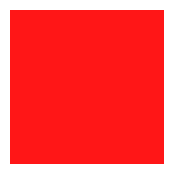

In [10]:
# 색상정보 확인하기
rgb_color = (255, 22, 23)
color_name = closest_color_name(rgb_color)
print(f"가장 가까운 색상 이름: {color_name}")
# 1x1 이미지 생성
plt.figure(figsize=(2, 2))
plt.imshow([[rgb_color]])
plt.axis('off')
plt.show()